___
# **Data Science Project** | Dados Finaceiros e sua Relação com a Inadimplência 
Notebook do Primeiro Projeto do curso "Profissão: Ciência de Dados" da [Ebac](https://ebaconline.com.br/cientista-de-dados?utm_source=google&utm_medium=cpc&utm_campaign=course_35_prefession-ds_google_search_all_conversions_all&utm_content=c_12614876388|adg_121700316878|ad_514041385166|ph_kwd-319947802962|key_ciência%20de%20dados|dev_c|pst_|rgnid_1001773|placement_&gclid=Cj0KCQiAoY-PBhCNARIsABcz771Mg0JQTBWmCdgi6Zklg3Ep90s0GVK_42HBprQYIoQFAROJCMjrtQEaAka4EALw_wcB)<br> 
[LinkedIn](https://www.linkedin.com/in/lucas-edmundo-m-1738b31a2) | [GitHub](https://github.com/lucasedmundo11) | [Kaggle](https://www.kaggle.com/lucasedmundo)<br>

> Este notebook está disponível no meu perfil no GitHub e Kaggle, a fim de compor o meu portfólio profissional, educacional e pessoal, demonstrando meus conhecimentos, aprendizados e paixão pela tecnologia.

___

## Etapa 1 CRISP - DM: Introdução ao Negócio 

Na primeira etapa da metodologia CRISP-DM, Cross Industry Standard Process for Data Mining, o negócio será introduzido, junto aos seus objetivos e obstáculos.

Deste modo, este projeto aborda um problema de concessão de cartões de crédito, divulgado no [Kaggle](https://www.kaggle.com/), plataforma desenvolvida com o intuito de proporcionar à comunidade de ciência de dados datasets, desafios, competições remuneradas e um meio de divulgação como portfólio profissional aos entusiastas do âmbito. [link original do Dataset](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

Esse Dataset contém dados de proponentes de cartão de crédito, logo, nosso objetivo é desenvolver um método para indentificar e localizar o risco de [inadimplência](https://www.serasa.com.br/ensina/seu-nome-limpo/o-que-e-inadimplencia/), caracterizada pelo atraso maior ou igual a 90 dias em um período de 12 meses, por meior de um modelo preditivo, utilizando todas as variáveis disponíveis.  

### Objetivos e Finalidades do CRISP-DM

Quanto ao negócio, deve ser desenvolvido um modelo que auxilie o cliente, ao invés da instituição de crédito. Como modelagem, o modelo deve auxiliar o mutuário a tomar as devidas decisões referentes ao crédito. Posto isso, o cenário no qual o negócio está inserido será analisado nesta etapa, a fim de compreender os principais tópicos envolvidos, os fatores responsáveis pelo fenômeno e, por conseguinte, os dados.

Também é nessa etapa que se constrói um planejamento do projeto.


___

## Etapa 2 Crisp-DM: Entendimento dos Dados

Durante a segunda etapa será realizado o entendimento dos dados, compreendendo da coleta à exploração e explicação dos mesmos por meio do dicionário de dados. Posto isso, os dados estão organizados no formato de uma tabela, cujas linhas representam os clientes e as colunas as variáveis, que detêm as características a serem observadas. 

### Dicionário de Dados

O Dataset possui 16 colunas, sendo elas 15 características do proponente e uma variável resposta `mau`. O dicionário de dados encontra-se abaixo neste notebook: 

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo, etc) | texto |
| educacao| Nível de educação (ex: secundário, superior, etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado, etc)| texto |
| tipo_residencia | Tipo de residência (ex: casa/apartamento, com os pais, etc) | texto |
| idade | Idade em anos |inteiro|
| tempo de emprego | Tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | Quantidade de pessoas na residência |inteiro|
| **mau** | Variável indicadora de mau pagador (True = mau, False = bom) |binária|



### Importação de Bibliotecas

Para este projeto serão utilizadas as bibliotecas [Pandas](https://pandas.pydata.org), [Seaborn](https://seaborn.pydata.org), [Matplotlib](https://matplotlib.org) e [Scikit-Learn](https://scikit-learn.org/stable/), a fim de realizar as etapas de exploração, transformação, visualização dos dados e desenvolvimento do modelo.


In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

### Carga dos Dados
Serão explorados os dados de crédito presentes neste [link](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) e, para isso, será utilizado a função `read_csv` da biblioteca Pandas para a leitura dos dados em um dataframe.

In [2]:
credit = pd.read_csv('demo01.csv')
print (f'Número de linhas e colunas da tabela: {credit.shape}')

credit.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


### Entendimento dos Dados - Univariadas

Nesta etapa serão realizadas análises univariadas das colunas mais relevantes, verificando a distribuição dos dados entre as variáveis. 

Distribuição da variável:
False    16260
True       390
Name: mau, dtype: int64


Taxa de inadimplentes:
0.023423423423423424


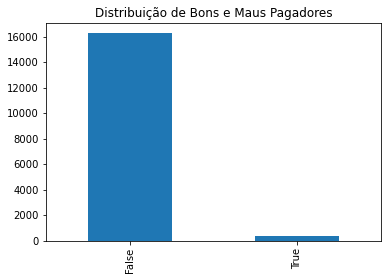

In [3]:
# Variável Default
credit['mau'].value_counts().plot.bar(title = 'Distribuição de Bons e Maus Pagadores')

print('Distribuição da variável:')
print(credit['mau'].value_counts())
print('\n\nTaxa de inadimplentes:')
print(credit['mau'].mean())


<AxesSubplot:title={'center':'Tipos de Renda'}>

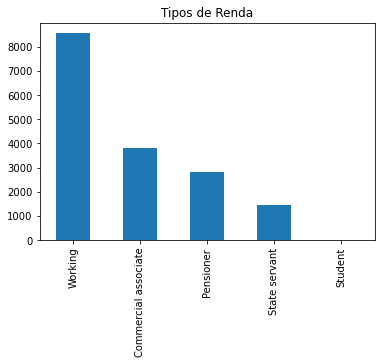

In [4]:
# Tipos de Renda
credit['tipo_renda'].value_counts().plot.bar(title = 'Tipos de Renda')

<AxesSubplot:title={'center':'Quantidade de Pessoas na Residência'}>

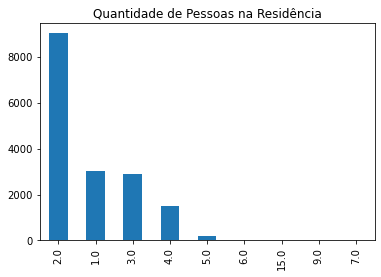

In [5]:
# Quantidade de Pessoas na Residência 
credit['qt_pessoas_residencia'].value_counts().plot.bar(title = 'Quantidade de Pessoas na Residência')

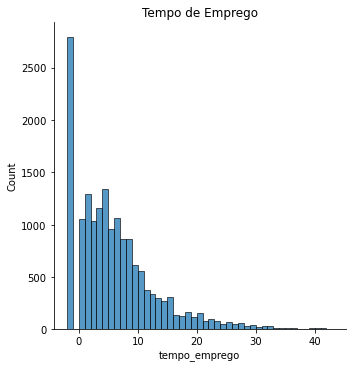

In [6]:
# Tempo de Emprego 
credit.loc[credit['tempo_emprego']<0, 'tempo_emprego'] = -2

gf_emprego = sns.displot(credit, x = 'tempo_emprego', bins = 45)
gf_emprego.set(title='Tempo de Emprego')
plt.show()


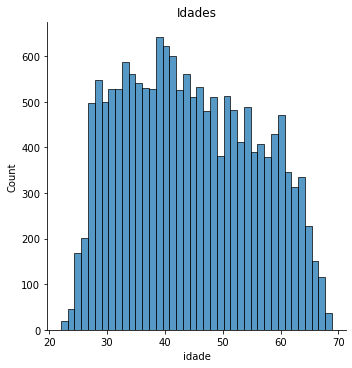

In [7]:
# Idades
gf_idade = sns.displot(credit, x = 'idade', bins = 40)
gf_idade.set(title='Idades')
plt.show()

### Entendimento dos Dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta e as variáveis explicativas será o objetivo das análises bivariadas nesta etapa. 


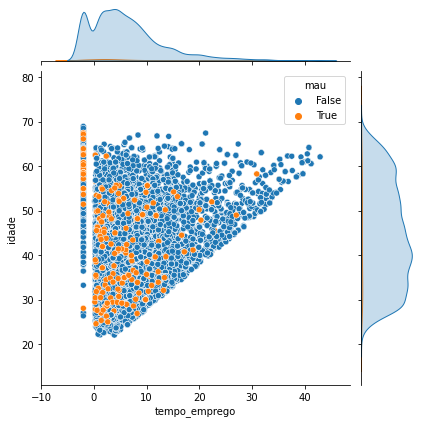

In [8]:
sns.jointplot(data=credit, x='tempo_emprego', y='idade', hue = 'mau')

In [9]:
freq = pd.crosstab(credit['mau'], credit['tipo_renda'])
freq

tipo_renda,Commercial associate,Pensioner,State servant,Student,Working
mau,,,,,
False,3728,2722,1425,8,8377
True,98,78,26,0,188


In [10]:
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

tipo_renda,Commercial associate,Pensioner,State servant,Student,Working
mau,,,,,
False,0.229274,0.167405,0.087638,0.000492,0.515191
True,0.251282,0.200000,0.066667,0.000000,0.482051


<AxesSubplot:xlabel='mau'>

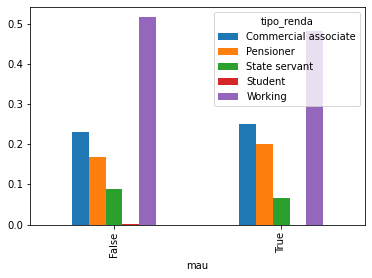

In [11]:
freq_pctlin.plot.bar()

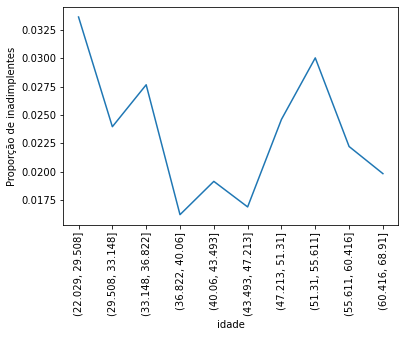

In [12]:
cat_srs, bins = pd.qcut(credit['idade'], 10, retbins=True)
g = credit.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)


___

## Etapa 3 Crisp-DM: Preparação dos Dados

Na terceira etapa do CRISP-DM:
- Seleção dos dados para análise
- Limpeza dos dados
- Construção de novos atributos com base nos atributos existentes
- Integração dos dados 
- Formatação dos dados


In [13]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [14]:
credit.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [15]:
metadata = pd.DataFrame(credit.dtypes)
metadata.reset_index(inplace = True)
metadata.columns=['variavel', 'tipo_de_dado']

var = list(metadata['variavel'])
categorias = list()
for var in var:
    categorias.append(len(credit[var].unique()))

metadata['qtd_categorias'] = categorias
metadata


,variavel,tipo_de_dado,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


In [16]:
df_credit = pd.get_dummies(credit, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 
                                            'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
df_credit

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,True,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,True,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,True,1,...,1,1,0,0,0,1,0,0,0,0


In [17]:
df_credit.dtypes

qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
sexo_M                                      uint8
posse_de_veiculo_Y                          uint8
posse_de_imovel_Y                           uint8
tipo_renda_Pensioner                        uint8
tipo_renda_State servant                    uint8
tipo_renda_Student                          uint8
tipo_renda_Working                          uint8
educacao_Higher education                   uint8
educacao_Incomplete higher                  uint8
educacao_Lower secondary                    uint8
educacao_Secondary / secondary special      uint8


In [18]:
df_credit['mau'] = df_credit['mau'].astype(int)
df_credit['mau'].dtypes 

dtype('int32')

In [19]:
df_credit

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,0,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,0,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,54.109589,9.884932,1,0,0,0,2.0,1,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,43.389041,7.380822,1,1,1,0,2.0,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
16648,0,30.005479,9.800000,1,1,0,0,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0


___

## Etapa 4 Crisp-DM: Modelagem

Na quarta etapa é realizada a construção do modelo.

- Escolha das técnicas de modelagem<br>
Para o presente projeto será utilizado a técnica de Floresta Aleatória (**Random Forest**), pois é relativamente fácil de se usar, versátil e robusta, encontrando padrões complexos nos dados e obtendo excelentes resultados.


- Desenho do teste<br>
O primeiro passo antes de executar o modelo é "desenhar" os testes a serem realizados. Deste modo, uma boa prática é dividir a base de dados em duas uma para ```treinamento```, no qual o algoritmo "aprende", e a segunda parte para ```teste```, servindo como uma avaaliação do modelo. Essa prática fornece uma métrica de avaliação mais fiel do modelo desenvolvido.


- Avaliação do modelo<br>
Posto isso, o modelo será avaliado através do percentual de acerto, tendo em vista a classificação do modelo (inadimplente e adimplente) e comparando com a variável resposta ```mau```. Esse método de avaliação pelo percentual de acertos e erros é chamado de acurácia.


### Dividindo a base em treino e teste

In [20]:
# Separando os dados do target
y = df_credit['mau']
x = df_credit.drop('mau', axis=1)

In [21]:
# Reazlizando a divisão entre treino e teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [22]:
x_train

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
13649,1,31.572603,5.183562,1,1,1,0,3.0,0,0,...,0,1,0,0,0,1,0,0,0,0
479,0,60.594521,4.441096,1,0,1,1,2.0,1,1,...,1,1,0,0,0,1,0,0,0,0
15216,1,33.728767,10.873973,1,0,0,0,3.0,0,0,...,1,1,0,0,0,1,0,0,0,0
2403,0,65.024658,16.621918,1,0,0,0,2.0,0,0,...,1,1,0,0,0,1,0,0,0,0
9248,0,31.375342,5.512329,1,0,0,0,2.0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,1,36.895890,10.547945,1,0,1,0,2.0,0,0,...,1,0,0,1,0,1,0,0,0,0
79,2,30.128767,6.271233,1,0,0,1,4.0,0,0,...,0,1,0,0,0,1,0,0,0,0
12119,0,63.591781,-2.000000,1,0,0,0,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0
14147,0,56.208219,6.205479,1,0,1,0,2.0,1,1,...,0,1,0,0,0,1,0,0,0,0


### Rodando o Modelo

A função RandomForestClassifier gera a estrutura da Floresta Aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente, a acurácia do modelo tende a aumentar com o número de árvores, até um certo limite, e, por conseguinte, aumenta o recurso computacional demandado.


In [23]:
# Treinando uma Random Forest com N árvores

clrf = RandomForestClassifier(n_estimators=21)
clrf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=21)

In [24]:
# Calculando a acuracia

y_pred = clrf.predict(x_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.32%


In [25]:
# Matriz de confusão

tab = pd.crosstab(index = y_pred, columns = y_test)
print(tab[1][0]/(tab[1][0] + tab[0][0]))
print(tab[1][1]/(tab[1][1] + tab[0][1]))
tab

0.018902439024390243
0.4533333333333333


mau,0,1
row_0,,
0,4827,93
1,41,34


___

## Etapa 5 Crisp-DM: Avaliação dos resultados

A ideia é avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.Como exemplo, considere que um cliente bom pagador deixa, em média, 5 '*dinheiros*' de lucro, e um mau pagador, 100 '*dinheiros*' de prejuízo.<br>
De acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4840 x 5          | 95 x (-100)    | 14.700 |
| Reprovar  |  28 x 5           | 32 x (-100)    | -3.060 |

Estariamos evitando, portanto, um prejuízo de -3.060 '*dinheiros*', ou seja, um aumento no lucro.

___

## Etapa 6 Crisp-DM: Implantação

Durante a etapa de implantação, coloca-se em uso o modelo desenvolvido, implementando-o em um sistema de crédito que toma as decisões com algum nível de automação. Deste modo, os clientes bons são aprovados, negando os ruins e evitando os intermediários, a fim de separá-los para análise manual.


___

Obrigado por chegado até aqui, espero que tenha gostado deste notebook! Caso possua dúvidas sobre o projeto, recomendações ou dicas, estarei disponível no meu [LinkedIn](https://www.linkedin.com/in/lucas-edmundo-m-1738b31a2).

Até a próxima :) 